Text(0.5, 1.0, 'Binary')

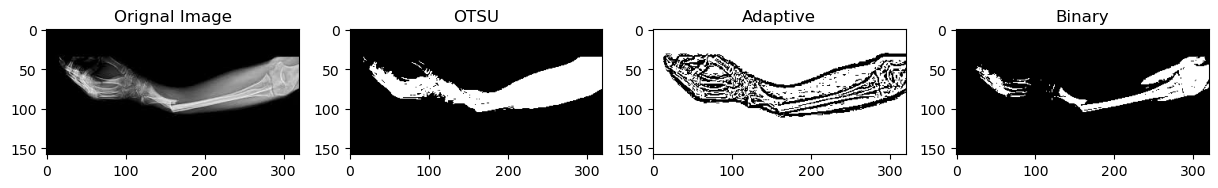

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


image = cv2.imread(r"C:\Users\Hp\Desktop\download.jpg", cv2.IMREAD_GRAYSCALE)
_, OTSUbinary_mask = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

ADAPbinary_mask = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

_, BINbinary_mask = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)





plt.figure(figsize=(15, 6))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Orignal Image')

plt.subplot(1, 4, 2)
plt.imshow(OTSUbinary_mask, cmap='gray')
plt.title('OTSU')

plt.subplot(1, 4, 3)
plt.imshow(ADAPbinary_mask, cmap='gray')
plt.title('Adaptive')


plt.subplot(1, 4, 4)
plt.imshow(BINbinary_mask, cmap='gray')
plt.title('Binary')


Text(0.5, 1.0, 'Mask')

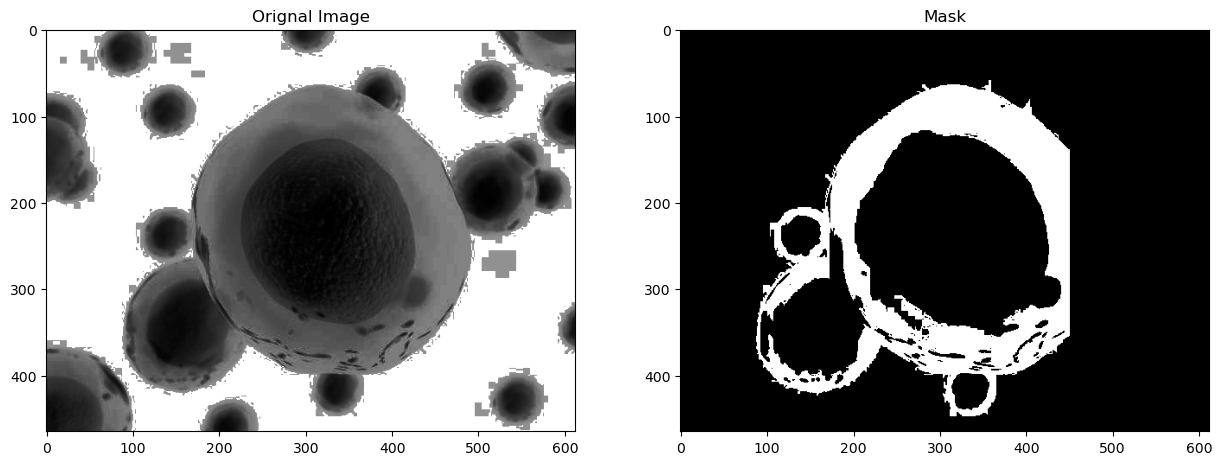

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r"C:\Users\Hp\Desktop\mic.jpg" , cv2.IMREAD_GRAYSCALE)
image = cv2.equalizeHist(image)
seed_point = (200 , 450)
def region_growing(image , seed, threshold):
    mask = np.zeros_like(image, dtype=np.uint8)

    stack = [seed]
    seed_intensity = image[seed]

    while stack:
        x , y = stack.pop()
        if x < 0 or x >= image.shape[0] or y < 0 or y >= image.shape[0]:
            continue

        if mask[x,y] == 0:
            if abs(int(image[x,y]) - int(seed_intensity)) < threshold:
                mask[x,y] = 255
                stack.extend([(x+1, y) , (x-1 , y) , (x, y-1)])
    
    return mask

threshold = 50

segment_image = region_growing(image , seed_point , threshold)


plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Orignal Image')

plt.subplot(1, 2, 2)
plt.imshow(segment_image, cmap='gray')
plt.title('Mask')


Number of coins: 11


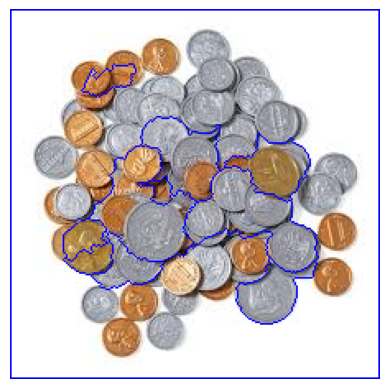

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r"C:\Users\Hp\Desktop\images (1).jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = np.ones((2, 2), np.uint8)
opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=5)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]

num_coins = len(np.unique(markers)) - 2
print(f"Number of coins: {num_coins}")

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


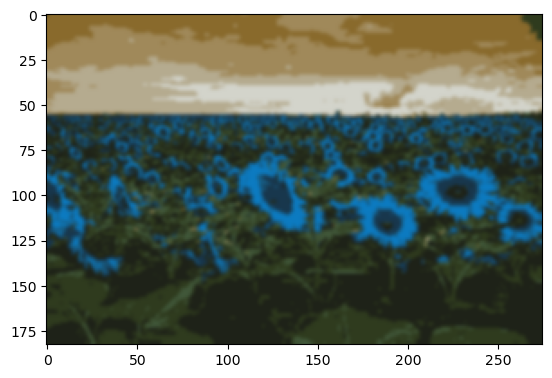

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r"C:\Users\Hp\Desktop\images (2).jpg")
pixel_values = image.reshape((-1,3))
pixel_values = np.float32(pixel_values)

criteria = (cv2.TermCriteria_EPS + cv2.TermCriteria_MAX_ITER , 100 ,0.1)
K=10
_, labels, centers = cv2.kmeans(pixel_values , K, None , criteria , 100, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]

segmented_image = segmented_image.reshape(image.shape)
segmented_image = cv2.GaussianBlur(segmented_image, (5, 5), 0)

plt.imshow(segmented_image)
plt.axis('on')
plt.show()


